## Page View Time Series Visualizer Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# 1.Importing data and setting date as index
df = pd.read_csv('fcc-forum-pageviews.csv')
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# 2.Data cleaning, filtering the data from its top 2.5 and bottom 2.5
lower = df['value'].quantile(0.025)
higher = df['value'].quantile(0.975)

df = df[(df['value'] > lower) & (df['value'] < higher)]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


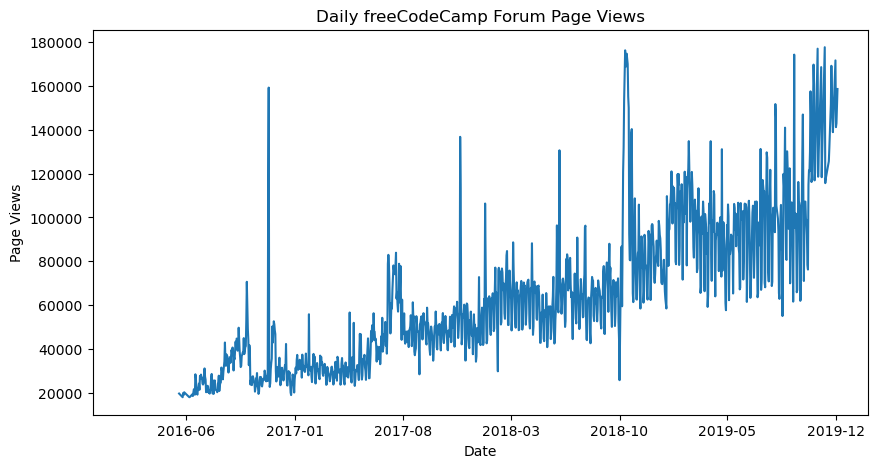

In [41]:
# 3.Drawing a line graph

df.index = pd.to_datetime(df.index, errors='coerce')
df = df.dropna(subset=['value'])
plt.figure(figsize=(10,5))
plt.plot(df.index, df['value'])
plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval= 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlim(pd.to_datetime('2015-12-01'), pd.to_datetime('2020-01-31'))
plt.show()

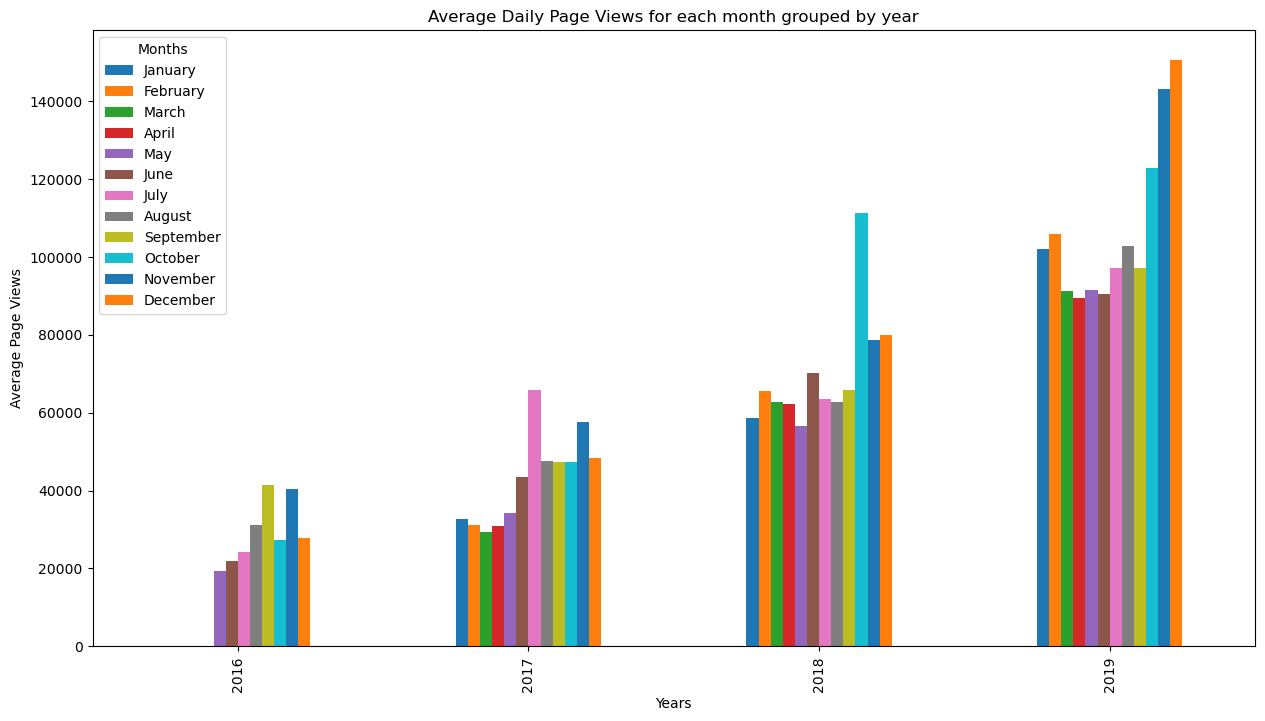

In [48]:
#4.Bar plots
df['Year'] = df.index.year
df['Month'] = df.index.month

avg = df.groupby(['Year','Month'])['value'].mean().unstack()

fig, ax = plt.subplots(figsize=(15,8))
avg.plot(kind='bar', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

ax.set_title('Average Daily Page Views for each month grouped by year')

ax.legend(title = 'Months', labels = month_names)
plt.show()

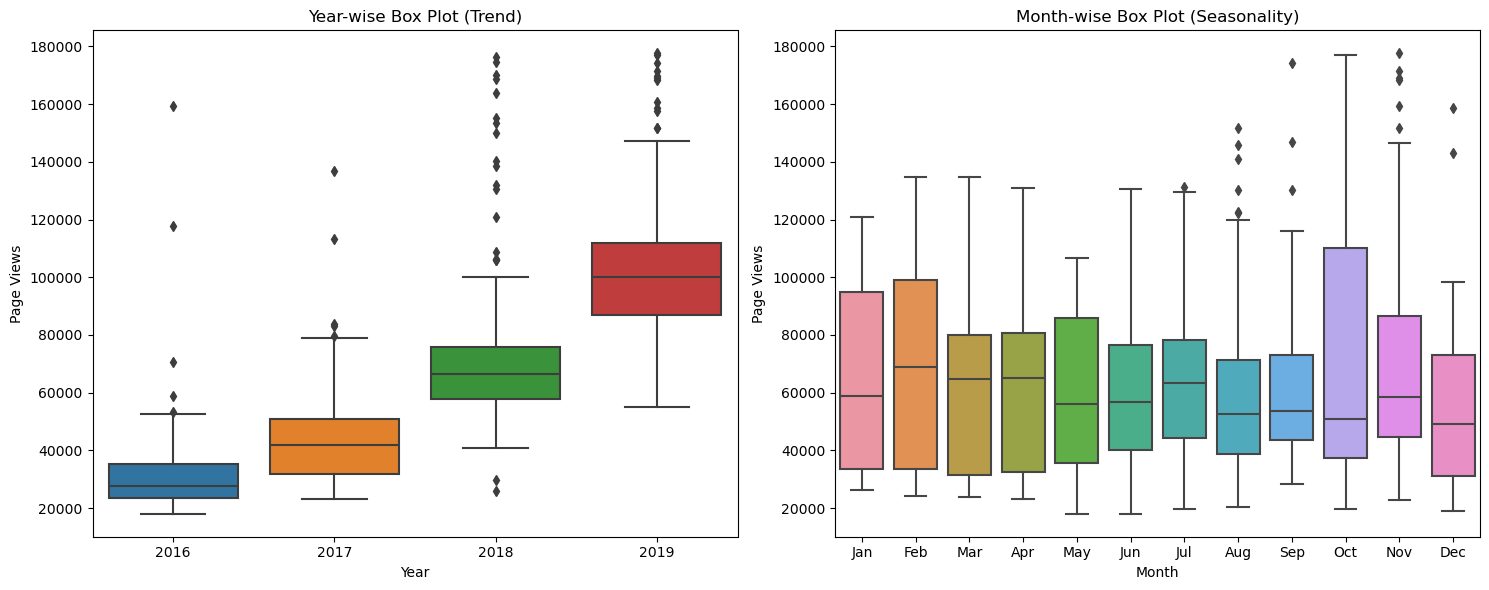

In [47]:
# 5. Box plots
df['year'] = df.index.year
df['month'] = df.index.strftime('%b') 


df['month_num'] = df.index.month
df = df.sort_values('month_num')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


sns.boxplot(x='year', y='value', data=df, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')


sns.boxplot(x='month', y='value', data=df, ax=axes[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')


plt.tight_layout()


plt.show()